In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./output_dataset.csv")

In [3]:
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,24-03-2019,1821,1911,1850,WN,Southwest Airlines Co.,1513,N448WN,110,...,4,11,0,N,0,21,0,0,0,0
1,1,23-06-2019,2147,2157,2017,EV,Atlantic Southeast Airlines,4848,N933EV,70,...,3,27,0,N,0,99,0,1,0,0
2,5,25-04-2019,2009,24,2125,MQ,American Eagle Airlines Inc.,3847,N502AE,195,...,4,38,0,N,0,0,44,15,0,120
3,6,14-06-2019,1819,1918,1900,WN,Southwest Airlines Co.,3711,N692SW,59,...,4,8,0,N,0,5,0,0,0,13
4,6,17-05-2019,1532,1625,1405,AA,American Airlines Inc.,820,N3CPAA,53,...,4,12,0,N,0,128,0,0,0,12


In [4]:
# Print the dimention of the dataframe and also show all the column names in the dataset:
rows, cols = df.shape
print(f"SHAPE BREAKDOWN\n{rows} rows and {cols} columns")

print("\nCOLUMN BREAKDOWN")
print(df.columns)

SHAPE BREAKDOWN
96910 rows and 29 columns

COLUMN BREAKDOWN
Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [5]:
# Display how many zero values each column has
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print("Total Zero in ",column_name," is: ",count)

Total Zero in  DayOfWeek  is:  0
Total Zero in  Date  is:  0
Total Zero in  DepTime  is:  0
Total Zero in  ArrTime  is:  0
Total Zero in  CRSArrTime  is:  0
Total Zero in  UniqueCarrier  is:  0
Total Zero in  Airline  is:  0
Total Zero in  FlightNum  is:  0
Total Zero in  TailNum  is:  0
Total Zero in  ActualElapsedTime  is:  0
Total Zero in  CRSElapsedTime  is:  0
Total Zero in  AirTime  is:  0
Total Zero in  ArrDelay  is:  0
Total Zero in  DepDelay  is:  0
Total Zero in  Origin  is:  0
Total Zero in  Org_Airport  is:  0
Total Zero in  Dest  is:  0
Total Zero in  Dest_Airport  is:  0
Total Zero in  Distance  is:  0
Total Zero in  TaxiIn  is:  6
Total Zero in  TaxiOut  is:  1
Total Zero in  Cancelled  is:  96910
Total Zero in  CancellationCode  is:  0
Total Zero in  Diverted  is:  96910
Total Zero in  CarrierDelay  is:  45522
Total Zero in  WeatherDelay  is:  90049
Total Zero in  NASDelay  is:  46550
Total Zero in  SecurityDelay  is:  96461
Total Zero in  LateAircraftDelay  is:  36457


In [6]:
# Display all unique values in each column:
print("Unique Value in Each Columns")
df.nunique()

Unique Value in Each Columns


DayOfWeek               7
Date                  181
DepTime              1288
ArrTime              1408
CRSArrTime           1241
UniqueCarrier          12
Airline                12
FlightNum            5827
TailNum              3439
ActualElapsedTime     505
CRSElapsedTime        432
AirTime               475
ArrDelay              519
DepDelay              532
Origin                271
Org_Airport           256
Dest                  272
Dest_Airport          258
Distance             1105
TaxiIn                107
TaxiOut               211
Cancelled               1
CancellationCode        1
Diverted                1
CarrierDelay          458
WeatherDelay          322
NASDelay              341
SecurityDelay          70
LateAircraftDelay     373
dtype: int64

In [7]:
# Summarise Dataset:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96910 entries, 0 to 96909
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DayOfWeek          96910 non-null  int64 
 1   Date               96910 non-null  object
 2   DepTime            96910 non-null  int64 
 3   ArrTime            96910 non-null  int64 
 4   CRSArrTime         96910 non-null  int64 
 5   UniqueCarrier      96910 non-null  object
 6   Airline            96910 non-null  object
 7   FlightNum          96910 non-null  int64 
 8   TailNum            96910 non-null  object
 9   ActualElapsedTime  96910 non-null  int64 
 10  CRSElapsedTime     96910 non-null  int64 
 11  AirTime            96910 non-null  int64 
 12  ArrDelay           96910 non-null  int64 
 13  DepDelay           96910 non-null  int64 
 14  Origin             96910 non-null  object
 15  Org_Airport        96649 non-null  object
 16  Dest               96910 non-null  objec

<h2> Data Cleaning </h2>

In [8]:
Column_Drop = ['Cancelled', 'Diverted', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime']
df = df.drop(columns = Column_Drop)
#df = df.dropna()

In [9]:
# Display how many zero values each column has
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print("Total Zero in ",column_name," is: ",count)

Total Zero in  DayOfWeek  is:  0
Total Zero in  UniqueCarrier  is:  0
Total Zero in  Airline  is:  0
Total Zero in  FlightNum  is:  0
Total Zero in  AirTime  is:  0
Total Zero in  ArrDelay  is:  0
Total Zero in  DepDelay  is:  0
Total Zero in  Origin  is:  0
Total Zero in  Org_Airport  is:  0
Total Zero in  Dest  is:  0
Total Zero in  Dest_Airport  is:  0
Total Zero in  Distance  is:  0
Total Zero in  TaxiIn  is:  6
Total Zero in  TaxiOut  is:  1
Total Zero in  CancellationCode  is:  0
Total Zero in  CarrierDelay  is:  45522
Total Zero in  WeatherDelay  is:  90049
Total Zero in  NASDelay  is:  46550
Total Zero in  SecurityDelay  is:  96461
Total Zero in  LateAircraftDelay  is:  36457


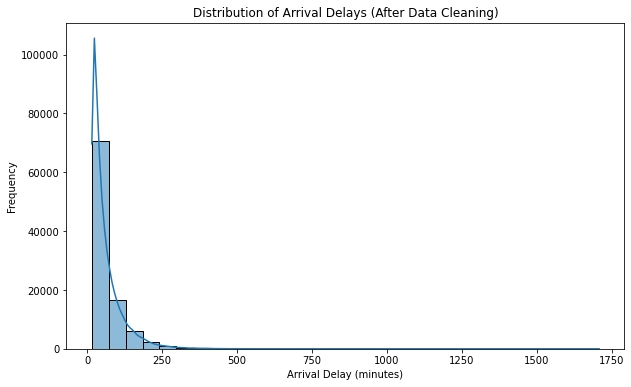

In [10]:
# Visualize the distribution of the target variable 'ArrDelay' after data cleaning
plt.figure(figsize=(10, 6))
sns.histplot(df['ArrDelay'], bins=30, kde=True)
plt.title('Distribution of Arrival Delays (After Data Cleaning)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

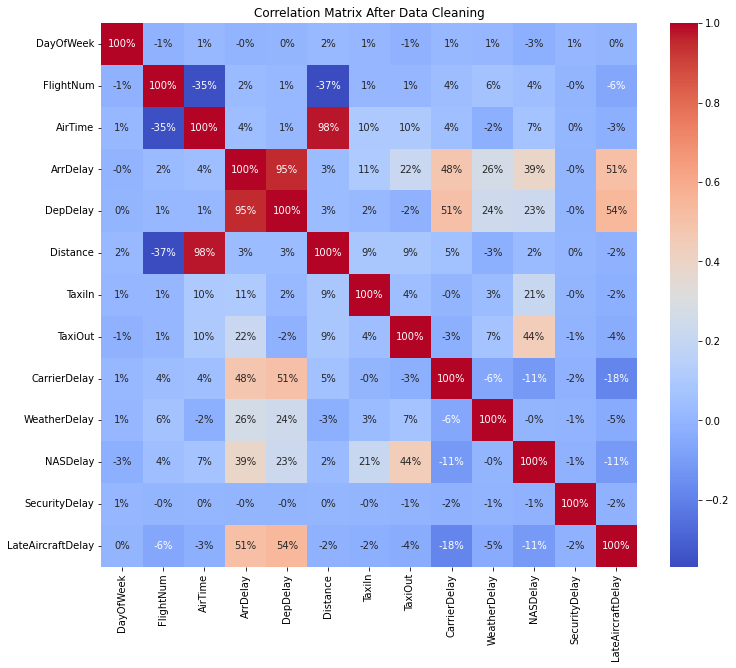

In [11]:
# Correlation matrix after data cleaning
correlation_after_cleaning = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_after_cleaning, annot=True, cmap='coolwarm', fmt=".0%")
plt.title('Correlation Matrix After Data Cleaning')
plt.show()

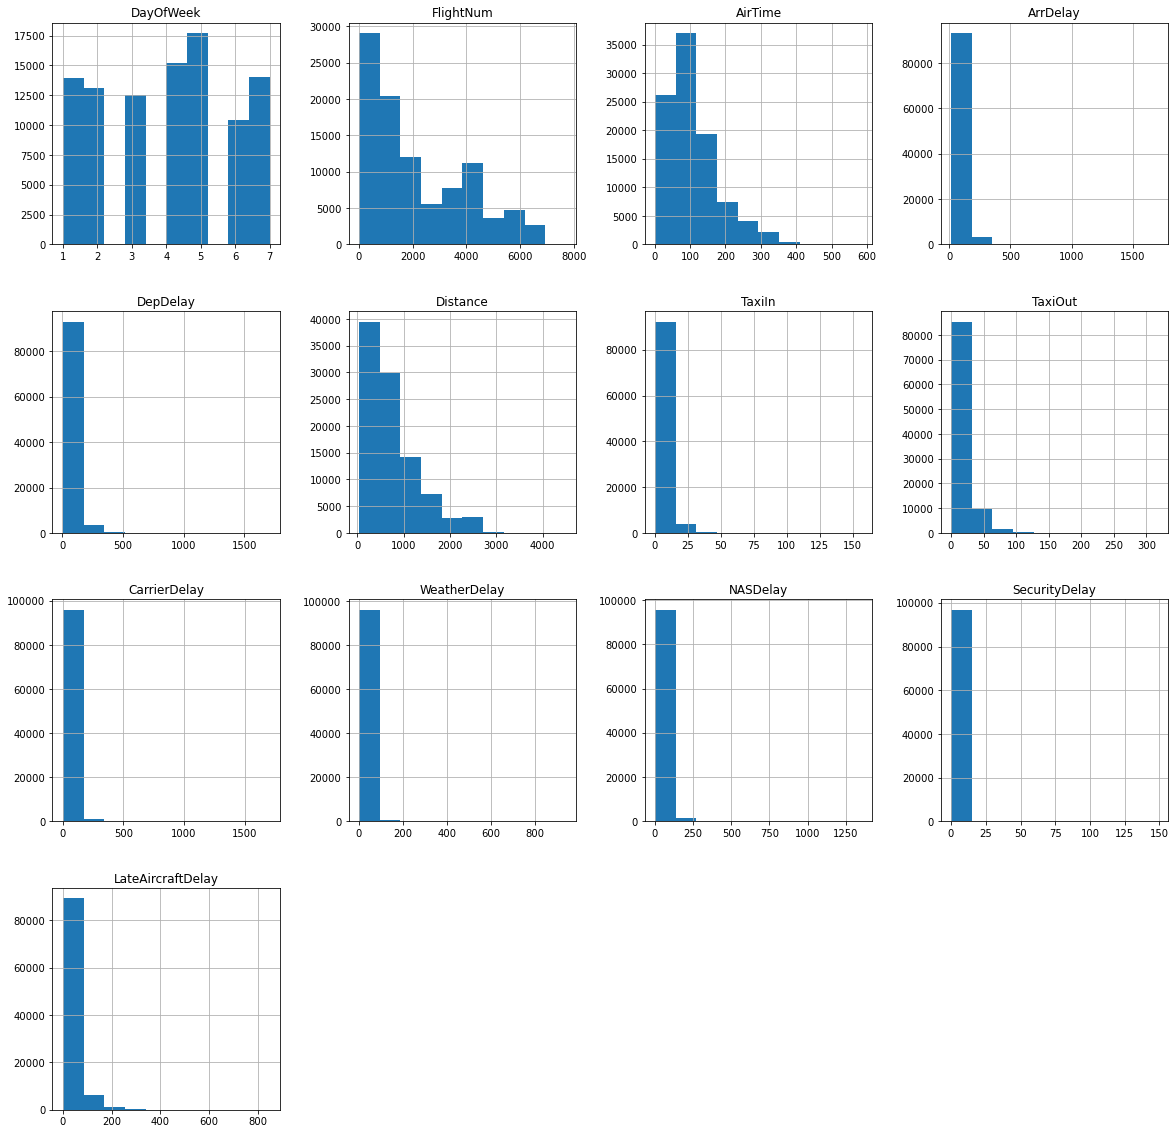

In [12]:
df.hist(figsize=(20, 20))
plt.show()

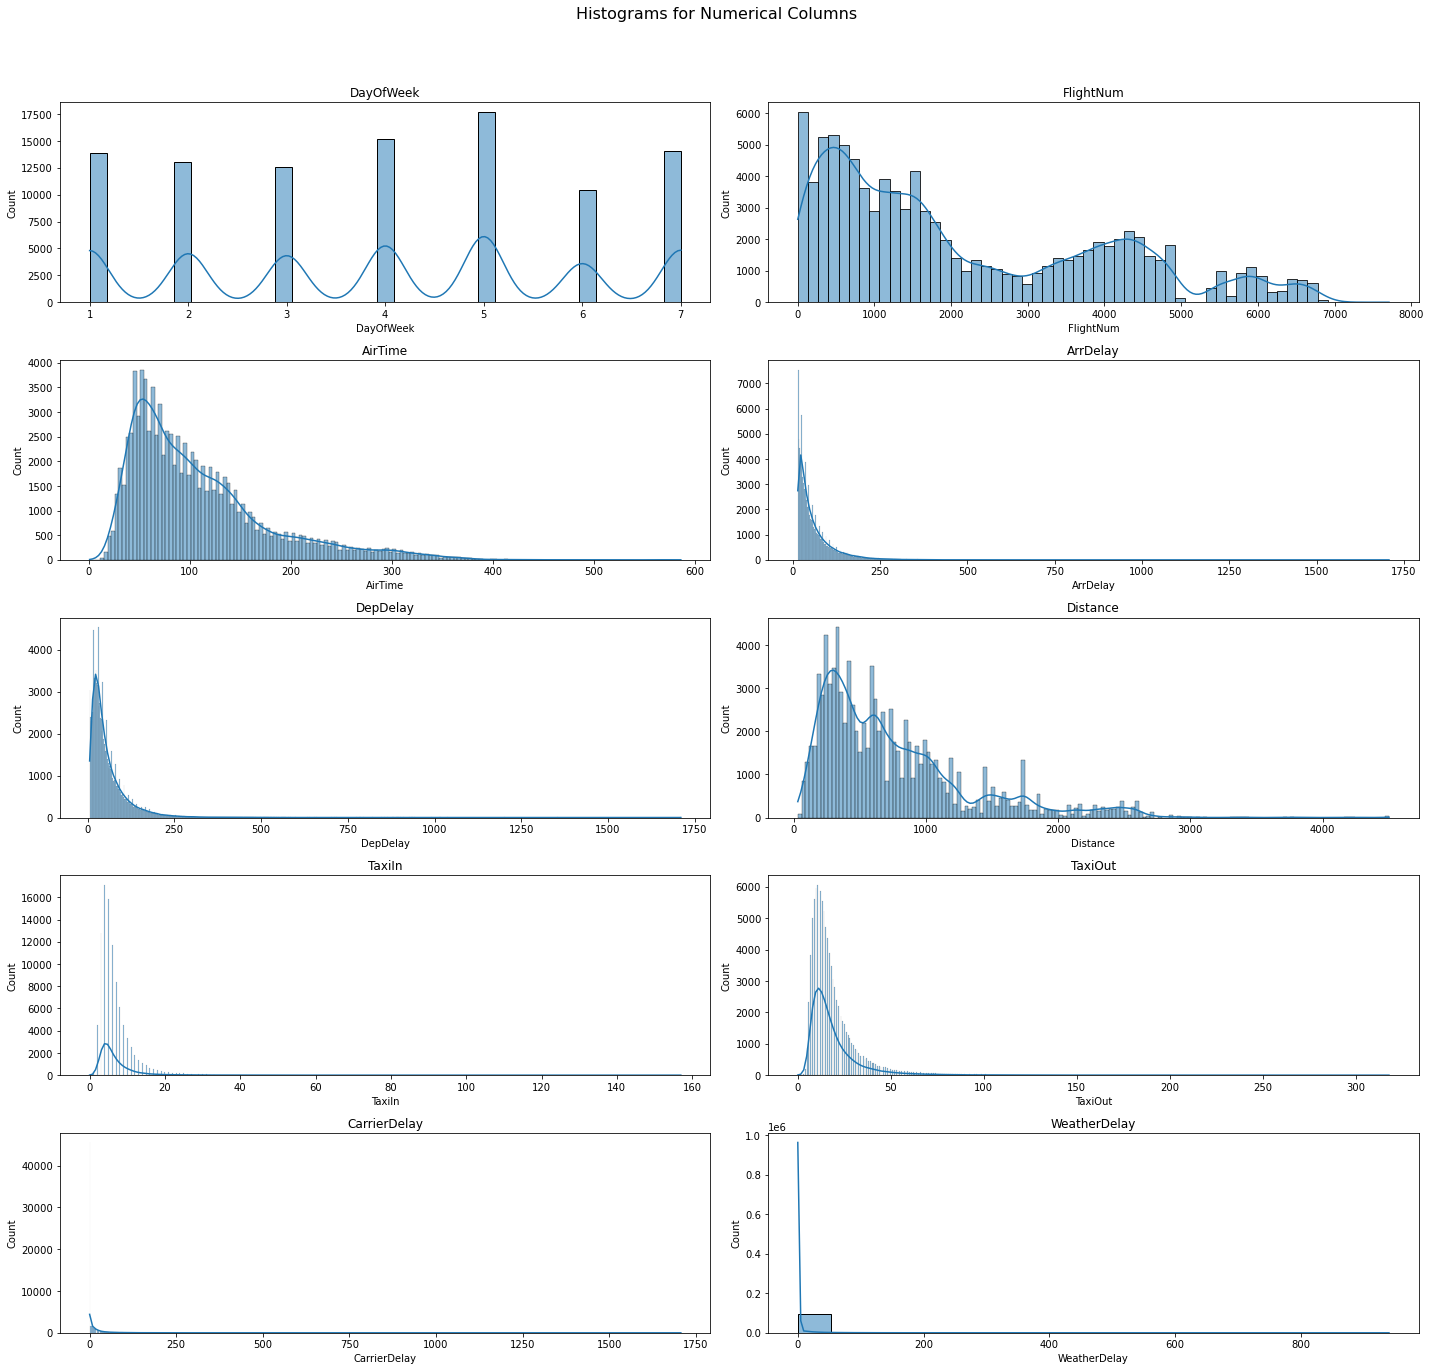

In [13]:
# Selecting the first 10 numerical columns
numerical_columns = df.select_dtypes(include='number').columns[:10]

# Creating subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
fig.suptitle('Histograms for Numerical Columns', fontsize=16)

# Plotting histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(column)

# Adjusting layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['UniqueCarrier'] = label_encoder.fit_transform(df['UniqueCarrier'])
df['Origin'] = label_encoder.fit_transform(df['Origin'])
df['Dest'] = label_encoder.fit_transform(df['Dest'])

In [15]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Airline', 'Org_Airport', 'Dest_Airport', 'CancellationCode'])

In [16]:
# 6. SPLITTING THE DATA FOR TRAINING AND TESTING
X = df.drop(columns=['ArrDelay'])
y = df['ArrDelay']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# 7. IMPLEMENTING MODELS
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

/Users/maheshpisharody/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
